In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import sklearn.linear_model as skl_lm
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.discrete.discrete_model as smd

In [102]:
dataset1 = pd.read_csv("/Users/nedianurani/Downloads/Assignment/Churn-Billing.csv",
                          sep=',', delimiter = None,
                          header='infer', names=None,
                          index_col = None, usecols = None,
                          encoding = "ISO-8859-1")

dataset2 = pd.read_csv("/Users/nedianurani/Downloads/Assignment/Churn-CustomerMasterData.csv",
                          sep=',', delimiter = None,
                          header='infer', names=None,
                          index_col = None, usecols = None,
                          encoding = "ISO-8859-1")

In [103]:
dataset1.columns

Index(['customerID', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [104]:
dataset2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents'], dtype='object')

In [105]:
dataset1.head()

,customerID,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [106]:
dataset2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,3999-WRNGR,Female,0,Yes,Yes
1,1965-DDBWU,Male,0,No,No
2,6734-CKRSM,Female,0,No,No
3,1761-AEZZR,Male,0,No,No
4,4138-NAXED,Male,0,No,No


In [107]:
dataset1.shape

(7043, 17)

In [108]:
dataset2.shape

(7043, 5)

In [109]:
data_merge = pd.merge(dataset1, dataset2, on='customerID')

In [110]:
data_merge.shape

(7043, 21)

In [111]:
data_merge.head()

,customerID,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,No phone service,DSL,No,Yes,No,No,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,No,DSL,Yes,No,Yes,No,No,...,One year,No,Mailed check,56.95,1889.50,No,Male,0,No,No
2,3668-QPYBK,2,Yes,No,DSL,Yes,Yes,No,No,No,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No
3,7795-CFOCW,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No
4,9237-HQITU,2,Yes,No,Fiber optic,No,No,No,No,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No


In [112]:
data_merge.describe(include='all')

,customerID,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
count,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,...,7043,7043,7043,7043.000000,7032.000000,7043,7043,7043.000000,7043,7043
unique,7043,NaN,2,3,3,3,3,3,3,3,...,3,2,4,NaN,NaN,2,2,NaN,2,2
top,7730-CLDSV,NaN,Yes,No,Fiber optic,No,No,No,No,No,...,Month-to-month,Yes,Electronic check,NaN,NaN,No,Male,NaN,No,No
freq,1,NaN,6361,3390,3096,3498,3088,3095,3473,2810,...,3875,4171,2365,NaN,NaN,5174,3555,NaN,3641,4933
mean,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,64.761692,2283.300441,NaN,NaN,0.162147,NaN,NaN
std,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,30.090047,2266.771362,NaN,NaN,0.368612,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,18.250000,18.800000,NaN,NaN,0.000000,NaN,NaN
25%,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,35.500000,401.450000,NaN,NaN,0.000000,NaN,NaN
50%,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,70.350000,1397.475000,NaN,NaN,0.000000,NaN,NaN
75%,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,89.850000,3794.737500,NaN,NaN,0.000000,NaN,NaN


In [203]:
 # remove samples with all missing values
data_merge = data_merge.dropna(how="all") 
data_merge.shape

(7043, 72)

In [205]:
data_merge = data_merge[~data_merge.duplicated()] # remove duplicates
data_merge.shape

(7043, 72)

In [206]:
total_charges_filter = data_merge.TotalCharges == " "
data_merge = data_merge[~total_charges_filter]
data_merge.shape

(7043, 72)

In [113]:
qualitative = ['PhoneService', 'MultipleLines','InternsetService','OnlineSecurity','OnlineBackup','DeviceProtection',
               'TechSupport', 'StreamingTV', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'gender','SeniorCitizen',
               'Partner', 'Dependents']
quantitative = ['tenure', 'MonthlyCharges', 'TotalCharges']
dependent = 'Churn'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c28dd4048>,
      dtype=object)

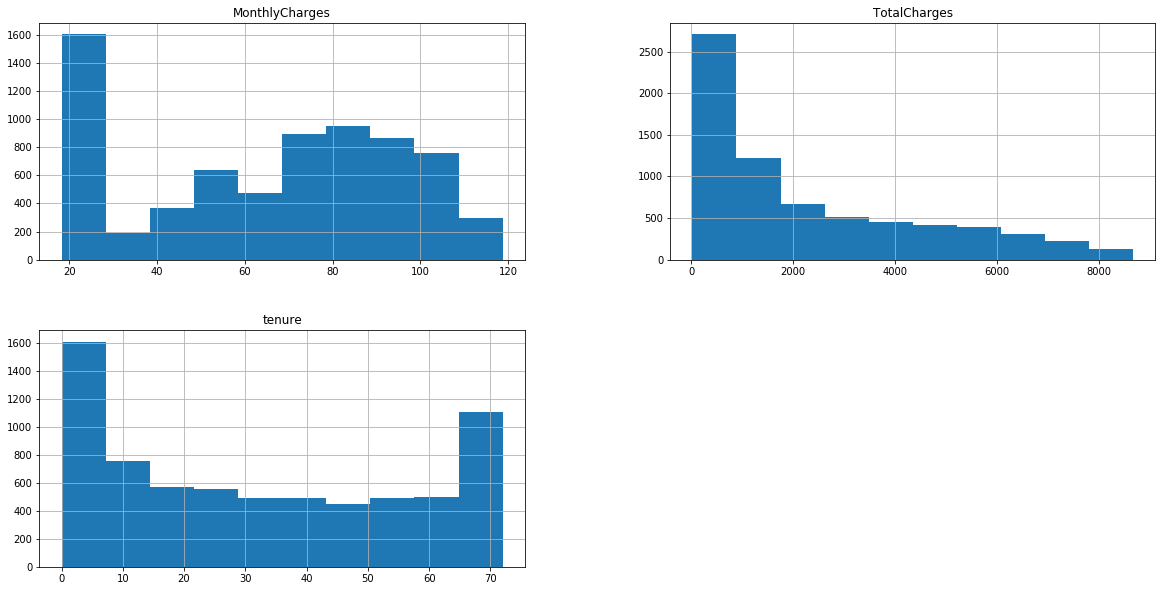

In [114]:
data_merge[quantitative].hist(bins=10, figsize=(20, 10))

/Users/nedianurani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'churned')

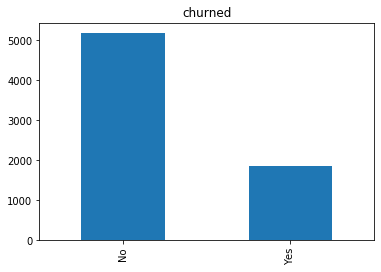

In [115]:
data_merge[dependent].value_counts().plot('bar').set_title('churned')

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer

In [117]:
data_merge.dtypes

customerID           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
dtype: object

In [118]:
data_merge[data_merge.isnull().any(axis=1)]

,customerID,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
488,4472-LVYGI,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,...,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,Female,0,Yes,Yes
753,3115-CZMZD,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,...,Two year,No,Mailed check,20.25,NaN,No,Male,0,No,Yes
936,5709-LVOEQ,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,...,Two year,No,Mailed check,80.85,NaN,No,Female,0,Yes,Yes
1082,4367-NUYAO,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,...,Two year,No,Mailed check,25.75,NaN,No,Male,0,Yes,Yes
1340,1371-DWPAZ,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,...,Two year,No,Credit card (automatic),56.05,NaN,No,Female,0,Yes,Yes
3331,7644-OMVMY,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,...,Two year,No,Mailed check,19.85,NaN,No,Male,0,Yes,Yes
3826,3213-VVOLG,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,...,Two year,No,Mailed check,25.35,NaN,No,Male,0,Yes,Yes
4380,2520-SGTTA,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,...,Two year,No,Mailed check,20.00,NaN,No,Female,0,Yes,Yes
5218,2923-ARZLG,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,...,One year,Yes,Mailed check,19.70,NaN,No,Male,0,Yes,Yes
6670,4075-WKNIU,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,...,Two year,No,Mailed check,73.35,NaN,No,Female,0,Yes,Yes


In [119]:
data_merge["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [120]:
data_merge["PhoneService"].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [121]:
from sklearn.preprocessing import LabelEncoder

lb_churn = LabelEncoder()
data_merge["Churn1"] = lb_churn.fit_transform(data_merge["Churn"])
data_merge[["Churn", "Churn1"]].head(5)

,Churn,Churn1
0,No,0
1,No,0
2,Yes,1
3,No,0
4,Yes,1


In [122]:
lb_contract = LabelEncoder()
data_merge["Contract1"] = lb_contract.fit_transform(data_merge["Contract"])
data_merge[["Contract", "Contract1"]].head(5)
data_merge["Contract1"].value_counts()

0    3875
2    1695
1    1473
Name: Contract1, dtype: int64

In [123]:
lb_ps = LabelEncoder()
data_merge["ps"] = lb_ps.fit_transform(data_merge["PhoneService"])
data_merge[["PhoneService", "ps"]].head(5)

,PhoneService,ps
0,No,0
1,Yes,1
2,Yes,1
3,No,0
4,Yes,1


In [124]:
lb_ml = LabelEncoder()
data_merge["ml"] = lb_ml.fit_transform(data_merge["MultipleLines"])
data_merge[["MultipleLines", "ml"]].head(5)

,MultipleLines,ml
0,No phone service,1
1,No,0
2,No,0
3,No phone service,1
4,No,0


In [125]:
lb_is = LabelEncoder()
data_merge["is"] = lb_is.fit_transform(data_merge["InternetService"])
data_merge[["InternetService", "is"]].head(5)

,InternetService,is
0,DSL,0
1,DSL,0
2,DSL,0
3,DSL,0
4,Fiber optic,1


In [126]:
lb_os = LabelEncoder()
data_merge["os"] = lb_os.fit_transform(data_merge["OnlineSecurity"])
data_merge[["OnlineSecurity", "os"]].head(5)

,OnlineSecurity,os
0,No,0
1,Yes,2
2,Yes,2
3,Yes,2
4,No,0


In [127]:
lb_ob = LabelEncoder()
data_merge["ob"] = lb_ob.fit_transform(data_merge["OnlineBackup"])
data_merge[["OnlineBackup", "ob"]].head(5)

,OnlineBackup,ob
0,Yes,2
1,No,0
2,Yes,2
3,No,0
4,No,0


In [128]:
lb_dp = LabelEncoder()
data_merge["dp"] = lb_dp.fit_transform(data_merge["DeviceProtection"])
data_merge[["DeviceProtection", "dp"]].head(5)

,DeviceProtection,dp
0,No,0
1,Yes,2
2,No,0
3,Yes,2
4,No,0


In [129]:
lb_ts = LabelEncoder()
data_merge["ts"] = lb_ts.fit_transform(data_merge["TechSupport"])
data_merge[["TechSupport", "ts"]].head(5)

,TechSupport,ts
0,No,0
1,No,0
2,No,0
3,Yes,2
4,No,0


In [130]:
lb_tv = LabelEncoder()
data_merge["tv"] = lb_tv.fit_transform(data_merge["StreamingTV"])
data_merge[["StreamingTV", "tv"]].head(5)
data_merge["tv"].value_counts()

0    2810
2    2707
1    1526
Name: tv, dtype: int64

In [131]:
lb_m = LabelEncoder()
data_merge["movie"] = lb_m.fit_transform(data_merge["StreamingMovies"])
data_merge[["StreamingMovies", "movie"]].head(5)
data_merge["movie"].value_counts()

0    2785
2    2732
1    1526
Name: movie, dtype: int64

In [132]:
lb_pb = LabelEncoder()
data_merge["pb"] = lb_pb.fit_transform(data_merge["PaperlessBilling"])
data_merge[["PaperlessBilling", "pb"]].head(5)

,PaperlessBilling,pb
0,Yes,1
1,No,0
2,Yes,1
3,No,0
4,Yes,1


In [133]:
lb_pm = LabelEncoder()
data_merge["pm"] = lb_pm.fit_transform(data_merge["PaymentMethod"])
data_merge[["PaymentMethod", "pm"]].head(5)

,PaymentMethod,pm
0,Electronic check,2
1,Mailed check,3
2,Mailed check,3
3,Bank transfer (automatic),0
4,Electronic check,2


In [134]:
lb_gender = LabelEncoder()
data_merge["gender1"] = lb_gender.fit_transform(data_merge["gender"])
data_merge[["gender", "gender1"]].head(5)

,gender,gender1
0,Female,0
1,Male,1
2,Male,1
3,Male,1
4,Female,0


In [135]:
lb_Partner = LabelEncoder()
data_merge["Partner1"] = lb_Partner.fit_transform(data_merge["Partner"])
data_merge[["Partner", "Partner1"]].head(5)

,Partner,Partner1
0,Yes,1
1,No,0
2,No,0
3,No,0
4,No,0


In [136]:
lb_Dependents = LabelEncoder()
data_merge["Dependents1"] = lb_Dependents.fit_transform(data_merge["Dependents"])
data_merge[["Dependents", "Dependents1"]].head(5)

,Dependents,Dependents1
0,No,0
1,No,0
2,No,0
3,No,0
4,No,0


In [137]:
data_merge.head()

,customerID,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,ob,dp,ts,tv,movie,pb,pm,gender1,Partner1,Dependents1
0,7590-VHVEG,1,No,No phone service,DSL,No,Yes,No,No,No,...,2,0,0,0,0,1,2,0,1,0
1,5575-GNVDE,34,Yes,No,DSL,Yes,No,Yes,No,No,...,0,2,0,0,0,0,3,1,0,0
2,3668-QPYBK,2,Yes,No,DSL,Yes,Yes,No,No,No,...,2,0,0,0,0,1,3,1,0,0
3,7795-CFOCW,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,...,0,2,2,0,0,0,0,1,0,0
4,9237-HQITU,2,Yes,No,Fiber optic,No,No,No,No,No,...,0,0,0,0,0,1,2,0,0,0


In [138]:
data_merge.describe(include='all')

,customerID,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,ob,dp,ts,tv,movie,pb,pm,gender1,Partner1,Dependents1
count,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
unique,7043,NaN,2,3,3,3,3,3,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,7730-CLDSV,NaN,Yes,No,Fiber optic,No,No,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,6361,3390,3096,3498,3088,3095,3473,2810,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.906432,0.904444,0.797104,0.985376,0.992475,0.592219,1.574329,0.504756,0.483033,0.299588
std,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.880162,0.879949,0.861551,0.885002,0.885091,0.491457,1.068104,0.500013,0.499748,0.458110
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000
75%,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000


In [139]:
dummy_is = pd.get_dummies(data_merge['InternetService'], prefix = 'is')

In [140]:
dummy_is.head()

,is_DSL,is_Fiber optic,is_No
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0


In [141]:
data_merge=pd.concat([data_merge,dummy_is], axis=1)
data_merge.head()

,customerID,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,tv,movie,pb,pm,gender1,Partner1,Dependents1,is_DSL,is_Fiber optic,is_No
0,7590-VHVEG,1,No,No phone service,DSL,No,Yes,No,No,No,...,0,0,1,2,0,1,0,1,0,0
1,5575-GNVDE,34,Yes,No,DSL,Yes,No,Yes,No,No,...,0,0,0,3,1,0,0,1,0,0
2,3668-QPYBK,2,Yes,No,DSL,Yes,Yes,No,No,No,...,0,0,1,3,1,0,0,1,0,0
3,7795-CFOCW,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,...,0,0,0,0,1,0,0,1,0,0
4,9237-HQITU,2,Yes,No,Fiber optic,No,No,No,No,No,...,0,0,1,2,0,0,0,0,1,0


In [154]:
dummy_ml = pd.get_dummies(data_merge['MultipleLines'], prefix = 'ml')
dummy_ml.head()

,ml_No,ml_No phone service,ml_Yes
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0


In [156]:
data_merge=pd.concat([data_merge,dummy_ml], axis=1)

In [157]:
dummy_os = pd.get_dummies(data_merge['OnlineSecurity'], prefix = 'os')
dummy_os.head()

,os_No,os_No internet service,os_Yes
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0


In [158]:
data_merge=pd.concat([data_merge,dummy_os], axis=1)

In [159]:
dummy_ob = pd.get_dummies(data_merge['OnlineBackup'], prefix = 'ob')
dummy_ob.head()

,ob_No,ob_No internet service,ob_Yes
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


In [160]:
data_merge=pd.concat([data_merge,dummy_ob], axis=1)

In [161]:
dummy_dp = pd.get_dummies(data_merge['DeviceProtection'], prefix = 'dp')
dummy_dp.head()

,dp_No,dp_No internet service,dp_Yes
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0


In [162]:
data_merge=pd.concat([data_merge,dummy_dp], axis=1)

In [163]:
dummy_ts = pd.get_dummies(data_merge['TechSupport'], prefix = 'ts')
dummy_ts.head()

,ts_No,ts_No internet service,ts_Yes
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0


In [164]:
data_merge=pd.concat([data_merge,dummy_ts], axis=1)

In [165]:
dummy_tv = pd.get_dummies(data_merge['StreamingTV'], prefix = 'tv')
dummy_tv.head()

,tv_No,tv_No internet service,tv_Yes
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [166]:
data_merge=pd.concat([data_merge,dummy_tv], axis=1)

In [167]:
dummy_movie = pd.get_dummies(data_merge['StreamingMovies'], prefix = 'movie')
dummy_movie.head()

,movie_No,movie_No internet service,movie_Yes
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [168]:
data_merge=pd.concat([data_merge,dummy_movie], axis=1)

In [150]:
data_merge["tenure"].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [151]:
def tenure_dum(data_merge) :
    
    if data_merge["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (data_merge["tenure"] > 12) & (data_merge["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (data_merge["tenure"] > 24) & (data_merge["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (data_merge["tenure"] > 48) & (data_merge["tenure"] <= 60) :
        return "Tenure_48-60"
    elif data_merge["tenure"] > 60 :
        return "Tenure_gt_60"
data_merge["tenure_dummy"] = data_merge.apply(lambda data_merge:tenure_dum(data_merge),
                                      axis = 1)

In [176]:
dummy_tenure = pd.get_dummies(data_merge['tenure_dummy'], prefix = 'tenure')
dummy_tenure.head()

,tenure_Tenure_0-12,tenure_Tenure_12-24,tenure_Tenure_24-48,tenure_Tenure_48-60,tenure_Tenure_gt_60
0,1,0,0,0,0
1,0,0,1,0,0
2,1,0,0,0,0
3,0,0,1,0,0
4,1,0,0,0,0


In [177]:
data_merge=pd.concat([data_merge,dummy_tenure], axis=1)

In [210]:
data_merge["tenure_dummy"].value_counts()

Tenure_0-12     2186
Tenure_24-48    1594
Tenure_gt_60    1407
Tenure_12-24    1024
Tenure_48-60     832
Name: tenure_dummy, dtype: int64

In [201]:
#recode tenure to be yaer
#transform monthly charger and total chareg using logarithm 
data_merge['log_tcharge'] = np.log(data_merge['TotalCharges'])
data_merge['log_tcharge'].head()

0    3.396185
1    7.544068
2    4.683519
3    7.517928
4    5.021575
Name: log_tcharge, dtype: float64

In [170]:
data_merge['log_mcharge'] = np.log(data_merge['MonthlyCharges'])
data_merge['log_mcharge'].head()

0    3.396185
1    4.042174
2    3.986202
3    3.744787
4    4.258446
Name: log_mcharge, dtype: float64

In [183]:
data_merge.dtypes

customerID             object
tenure                  int64
PhoneService           object
MultipleLines          object
InternetService        object
                        ...  
tenure_Tenure_0-12      uint8
tenure_Tenure_12-24     uint8
tenure_Tenure_24-48     uint8
tenure_Tenure_48-60     uint8
tenure_Tenure_gt_60     uint8
Length: 71, dtype: object

/Users/nedianurani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'churn1')

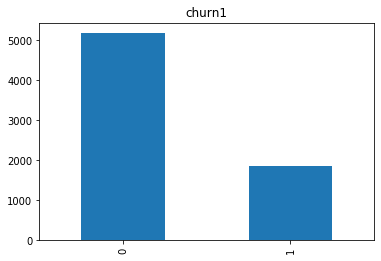

In [199]:
data_merge['Churn1'].value_counts().plot('bar').set_title('churn1')

In [211]:
X_train = sm.add_constant(data_merge[['gender1', 'log_mcharge', 'Partner1', 'tenure_Tenure_12-24','tenure_Tenure_24-48',
                                      'tenure_Tenure_48-60', 'tenure_Tenure_gt_60']])
y = data_merge.Churn1
est = smd.Logit(y, X_train).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.460425
         Iterations 7


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-6.451770,0.279262,-23.102922,4.327187e-118,-6.999114,-5.904426
gender1,0.002570,0.061448,0.041828,9.666361e-01,-0.117865,0.123006
log_mcharge,1.629752,0.068711,23.718993,2.296531e-124,1.495081,1.764422
Partner1,-0.141412,0.065974,-2.143455,3.207659e-02,-0.270719,-0.012106
tenure_Tenure_12-24,-1.070337,0.089240,-11.993867,3.826159e-33,-1.245245,-0.895429
tenure_Tenure_24-48,-1.679463,0.084925,-19.775729,4.818157e-87,-1.845914,-1.513012
tenure_Tenure_48-60,-2.218086,0.117887,-18.815409,5.647089e-79,-2.449139,-1.987032
tenure_Tenure_gt_60,-3.216059,0.127664,-25.191540,4.959024e-140,-3.466276,-2.965842
